In [18]:
%matplotlib inline
import pandas as pd
from blockchain import statistics

In [101]:
def price(d,b_b,w_gh):
    d_w=.12/(3.6*10**6)
    w_h=w_gh/10**9
    hash_price= d_w * w_h
    plock_price = d * 2**32 * hash_price
    bit_price = plock_price / b_b
    bit_price
    return bit_price

In [187]:
dif_url = "https://api.blockchain.info/charts/difficulty?format=csv&timespan=all"
price_url="https://blockchain.info/charts/market-price?format=csv&timespan=all"

In [188]:
dif_df=pd.read_csv(dif_url,names=['date','difficulty'])
dif_df['date']=pd.to_datetime(dif_df.date)
dif_df.set_index('date',inplace=True)

In [189]:
b50 = (dif_df.index < '2012-11-28')
b25 = (dif_df.index >= '2012-11-28') & (dif_df.index < '2016-07-09')
b12 = (dif_df.index >= '2016-07-09')
dif_df.loc[b50,'b_b']=50
dif_df.loc[b25,'b_b']=25
dif_df.loc[b12,'b_b']=12.5

In [190]:
s0 = (dif_df.index < '2014-12-27')
s5 = (dif_df.index >= '2014-12-27') & (dif_df.index < '2015-09-30')
s7 = (dif_df.index >= '2015-09-30') & (dif_df.index < '2016-09-12')
s9 = (dif_df.index >= '2016-06-12')
dif_df.loc[s0,'w_gh']= 1
dif_df.loc[s5,'w_gh']= .25
dif_df.loc[s7,'w_gh']=.216
dif_df.loc[s9,'w_gh']=.098

In [191]:
dif_df['cost']=dif_df.apply(lambda x:price(x.difficulty,x.b_b,x.w_gh),axis=1)

In [192]:
price_df=pd.read_csv(price_url,names=['date','price'])
price_df['date']=pd.to_datetime(price_df.date)
price_df.set_index('date',inplace=True)

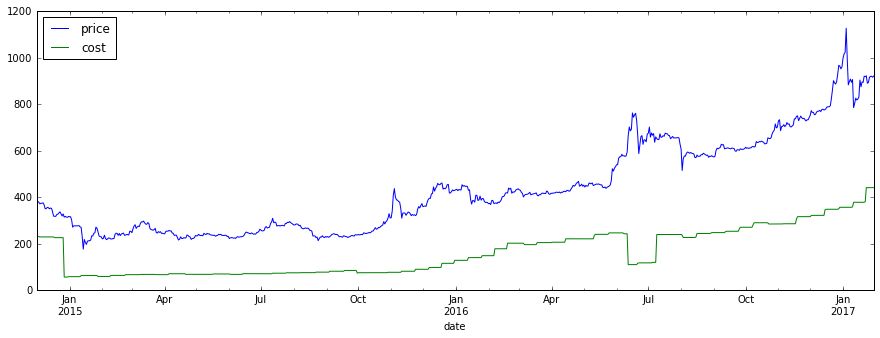

In [193]:
df=dif_df.merge(price_df,left_index=True,right_index=True)
df2=df.loc[dif_df.index >= '2014-12-01']
df2[['price','cost']].plot(figsize=(15,5))

In [212]:
dif_csv = "difficulty"
price_csv= "etherprice"

In [203]:
dif_df=pd.read_csv(dif_csv,names=['date','difficulty'],delimiter=';')
dif_df['date']=pd.to_datetime(dif_df.date)
dif_df.set_index('date',inplace=True)

In [217]:
dif_df.loc[b50,'b_b']=5

In [218]:
s0 = (dif_df.index < '2014-12-27')
s5 = (dif_df.index >= '2014-12-27') & (dif_df.index < '2015-09-30')
s7 = (dif_df.index >= '2015-09-30') & (dif_df.index < '2016-09-12')
s9 = (dif_df.index >= '2016-06-12')
dif_df.loc[s0,'w_gh']= 1
dif_df.loc[s5,'w_gh']= .25
dif_df.loc[s7,'w_gh']=.216
dif_df.loc[s9,'w_gh']=.098

In [219]:
dif_df['cost']=dif_df.apply(lambda x:price(x.difficulty,x.b_b,x.w_gh),axis=1)

In [220]:
price_df=pd.read_csv(price_csv,names=['date','price'],delimiter=';')
price_df['date']=pd.to_datetime(price_df.date)
price_df.set_index('date',inplace=True)

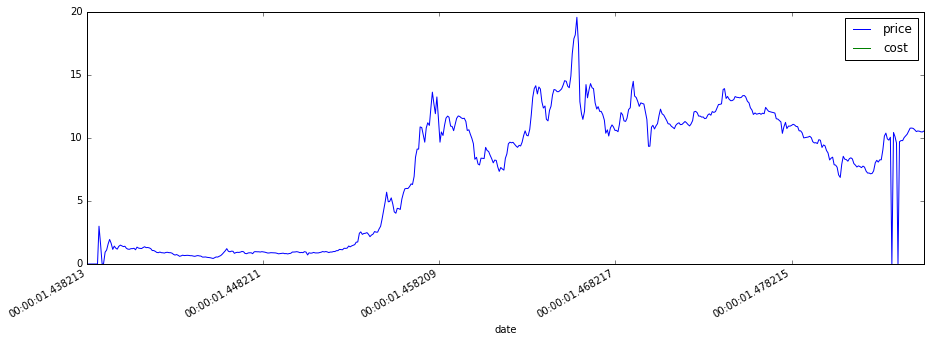

In [226]:
df=dif_df.merge(price_df,left_index=True,right_index=True)
df[['price','cost']].plot(figsize=(15,5))

In [227]:
df

,difficulty,b_b,w_gh,cost,price
date,,,,,
1970-01-01 00:00:01.438214400,0.121,5.0,1.0,3.464607e-09,0.00
1970-01-01 00:00:01.438300800,0.603,5.0,1.0,1.726577e-08,0.00
1970-01-01 00:00:01.438387200,0.887,5.0,1.0,2.539757e-08,0.00
1970-01-01 00:00:01.438473600,1.020,5.0,1.0,2.920578e-08,0.00
1970-01-01 00:00:01.438560000,1.126,5.0,1.0,3.224089e-08,0.00
1970-01-01 00:00:01.438646400,1.217,5.0,1.0,3.484650e-08,0.00
1970-01-01 00:00:01.438732800,1.328,5.0,1.0,3.802478e-08,0.00
1970-01-01 00:00:01.438819200,1.381,5.0,1.0,3.954233e-08,0.00
1970-01-01 00:00:01.438905600,1.471,5.0,1.0,4.211931e-08,3.00
